In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import warnings
import os
import graphviz
import joblib
import time
from sklearn.feature_selection import SelectFromModel
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 228.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import warnings
import os
import graphviz
import joblib
import time
from sklearn.feature_selection import SelectFromModel
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
def load_data(file_path):
    """
    Load the CIS-IDS-2017 dataset
    
    Args:
        file_path: Path to the dataset CSV file
        
    Returns:
        df: Loaded DataFrame
    """
    print(f"Loading dataset from {file_path}...")
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully with shape: {df.shape}")
    return df


In [5]:
file_path = "/Users/kimishchoudhary/Downloads/archive/CIS-IDS-2017.csv"
df = load_data(file_path)


Loading dataset from /Users/kimishchoudhary/Downloads/archive/CIS-IDS-2017.csv...
Dataset loaded successfully with shape: (225745, 79)


In [7]:
def load_data(file_path):
    """
    Load the CIC-IDS-2017 dataset
    
    Args:
        file_path: Path to the dataset CSV file
        
    Returns:
        df: Loaded DataFrame
    """
    print(f"Loading dataset from {file_path}...")
    file_path = "/Users/kimishchoudhary/Downloads/archive/CIS-IDS-2017.csv"
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully with shape: {df.shape}")
    return df

In [8]:
def explore_data(df):
    """
    Explore the dataset and print useful information
    
    Args:
        df: DataFrame to explore
    """
    print("\n===== DATASET EXPLORATION =====")
    
    print(f"\nDataset shape: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head())
    
    print("\nData types:")
    display(df.dtypes)
    
    print("\nSummary statistics of numerical features:")
    display(df.describe())
    
    print("\nClass distribution:")
    class_dist = df['Label'].value_counts()
    display(class_dist)
    
    # Plotting class distribution
    plt.figure(figsize=(12, 6))
    class_dist.plot(kind='bar', color='skyblue')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("\nMissing values in each column:")
        display(missing_values[missing_values > 0])
    else:
        print("\nNo missing values found in the dataset.")

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
def load_data(file_path):
    """Load the CIC-IDS 2017 dataset"""
    print(f"Loading data from: {file_path}")
    df = pd.read_csv(file_path)
    print(f"Dataset loaded with shape: {df.shape}")
    return df

# Update this path to your actual file location
file_path = "/Users/kimishchoudhary/Downloads/archive/CIS-IDS-2017.csv"  # Replace with your actual file path
df = load_data(file_path)

Loading data from: /Users/kimishchoudhary/Downloads/archive/CIS-IDS-2017.csv
Dataset loaded with shape: (225745, 79)


In [ ]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nBasic information about the dataset:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

print("\nTarget variable distribution:")
print(df[' Label'].value_counts())
print("Preprocessing data...")

# Handle missing values
df_cleaned = df.copy()
print(f"Missing values before cleaning: {df_cleaned.isnull().sum().sum()}")
df_cleaned = df_cleaned.fillna(0)
print(f"Missing values after cleaning: {df_cleaned.isnull().sum().sum()}")

# Handle infinite values
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)
df_cleaned = df_cleaned.fillna(0)

First 5 rows of the dataset:
    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                  

In [13]:
print("Preprocessing data...")

# Handle missing values
df_cleaned = df.copy()
print(f"Missing values before cleaning: {df_cleaned.isnull().sum().sum()}")
df_cleaned = df_cleaned.fillna(0)
print(f"Missing values after cleaning: {df_cleaned.isnull().sum().sum()}")

# Handle infinite values
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)
df_cleaned = df_cleaned.fillna(0)


Preprocessing data...
Missing values before cleaning: 4
Missing values after cleaning: 0


In [14]:
# Encode the target variable
label_encoder = LabelEncoder()
df_cleaned['Label_Encoded'] = label_encoder.fit_transform(df_cleaned[' Label'])

# Print the label mapping for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:")
for label, code in label_mapping.items():
    print(f"{label} -> {code}")

Label mapping:
BENIGN -> 0
DDoS -> 1


In [19]:
print(df_cleaned.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [20]:
df_cleaned.columns = df_cleaned.columns.str.strip()

In [21]:
print(df_cleaned.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [23]:
# Remove leading and trailing spaces from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Select relevant features for traffic classification based on the cleaned column names
traffic_features = [
    'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    'Flow Packets/s', 'Flow Bytes/s', 'Flow IAT Mean',
    'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
    'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
    'Packet Length Mean', 'Packet Length Std'
]

# Feature and target for traffic classification
X_traffic = df_cleaned[traffic_features]
y_traffic = df_cleaned['Label_Encoded']

print(f"Selected {len(traffic_features)} features for traffic classification")
print(f"X shape: {X_traffic.shape}, y shape: {y_traffic.shape}")


Selected 15 features for traffic classification
X shape: (225745, 15), y shape: (225745,)


In [24]:
threat_features = [
    'Flow Duration', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    'Packet Length Mean', 'Flow Packets/s', 'Flow Bytes/s',
    'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Mean', 'Bwd IAT Mean',
    'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward'
]

# Features and target for threat detection
X_threat = df_cleaned[threat_features]
y_threat = df_cleaned['Label_Encoded']

print(f"Selected {len(threat_features)} features for threat detection")
print(f"X shape: {X_threat.shape}, y shape: {y_threat.shape}")

Selected 17 features for threat detection
X shape: (225745, 17), y shape: (225745,)


In [25]:
# Scale features for both models
scaler_traffic = StandardScaler()
X_traffic_scaled = scaler_traffic.fit_transform(X_traffic)

scaler_threat = StandardScaler()
X_threat_scaled = scaler_threat.fit_transform(X_threat)

print("Features scaled successfully!")

Features scaled successfully!


In [26]:
# Split data for traffic classification
X_train_traffic, X_test_traffic, y_train_traffic, y_test_traffic = train_test_split(
    X_traffic_scaled, y_traffic, test_size=0.3, random_state=42, stratify=y_traffic
)

# Split data for threat detection
X_train_threat, X_test_threat, y_train_threat, y_test_threat = train_test_split(
    X_threat_scaled, y_threat, test_size=0.3, random_state=42, stratify=y_threat
)

print("Data split complete!")
print(f"Traffic Classification - Training set: {X_train_traffic.shape}, Test set: {X_test_traffic.shape}")
print(f"Threat Detection - Training set: {X_train_threat.shape}, Test set: {X_test_threat.shape}")


Data split complete!
Traffic Classification - Training set: (158021, 15), Test set: (67724, 15)
Threat Detection - Training set: (158021, 17), Test set: (67724, 17)


In [27]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model_type="traffic"):
    """Train and evaluate classification model"""
    
    # Initialize models
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
    
    # Train Random Forest model
    print(f"Training Random Forest model for {model_type} classification...")
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    
    # Train Decision Tree model
    print(f"Training Decision Tree model for {model_type} classification...")
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    
    # Evaluate Random Forest model
    print("\nRandom Forest Model Evaluation:")
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    print(f"Accuracy: {rf_accuracy:.4f}")
    
    # Evaluate Decision Tree model
    print("\nDecision Tree Model Evaluation:")
    dt_accuracy = accuracy_score(y_test, y_pred_dt)
    print(f"Accuracy: {dt_accuracy:.4f}")
    
    return rf_model, dt_model, y_pred_rf, y_pred_dt

# Train and evaluate traffic classification model
rf_traffic, dt_traffic, y_pred_rf_traffic, y_pred_dt_traffic = train_and_evaluate_model(
    X_train_traffic, X_test_traffic, y_train_traffic, y_test_traffic, "traffic"
)

Training Random Forest model for traffic classification...
Training Decision Tree model for traffic classification...

Random Forest Model Evaluation:
Accuracy: 0.9994

Decision Tree Model Evaluation:
Accuracy: 0.9991


In [28]:
# Train and evaluate threat detection model
rf_threat, dt_threat, y_pred_rf_threat, y_pred_dt_threat = train_and_evaluate_model(
    X_train_threat, X_test_threat, y_train_threat, y_test_threat, "threat"
)


Training Random Forest model for threat classification...
Training Decision Tree model for threat classification...

Random Forest Model Evaluation:
Accuracy: 1.0000

Decision Tree Model Evaluation:
Accuracy: 0.9981


Traffic Classification - Random Forest Model Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     29316
        DDoS       1.00      1.00      1.00     38408

    accuracy                           1.00     67724
   macro avg       1.00      1.00      1.00     67724
weighted avg       1.00      1.00      1.00     67724



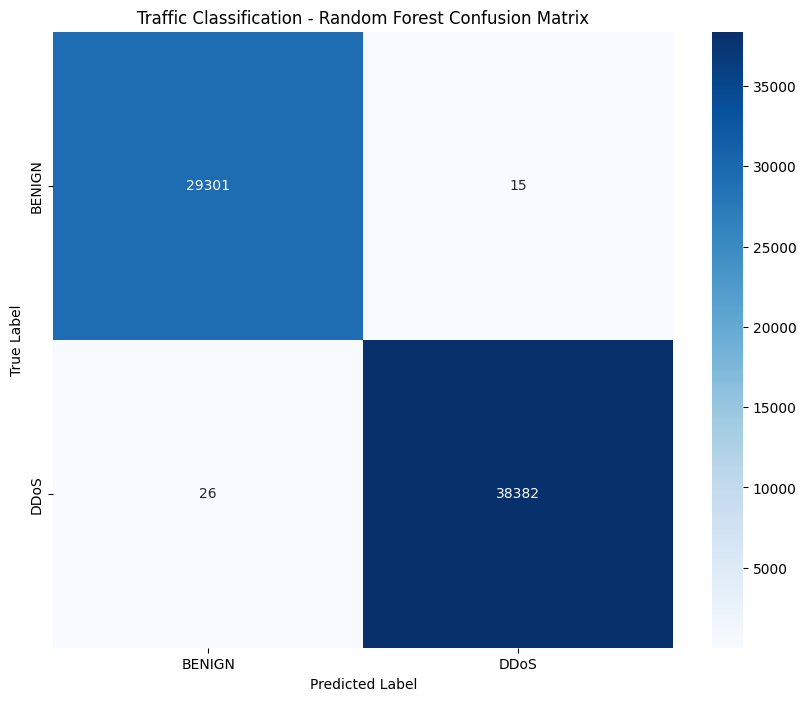

In [29]:
def plot_confusion_matrix(y_true, y_pred, class_names, title):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Get class names
class_names = label_encoder.classes_

# Traffic Classification - Random Forest Report
print("Traffic Classification - Random Forest Model Report:")
print(classification_report(y_test_traffic, y_pred_rf_traffic, target_names=class_names))

# Plot confusion matrix for traffic classification (Random Forest)
plot_confusion_matrix(
    y_test_traffic, 
    y_pred_rf_traffic, 
    class_names,
    "Traffic Classification - Random Forest Confusion Matrix"
)


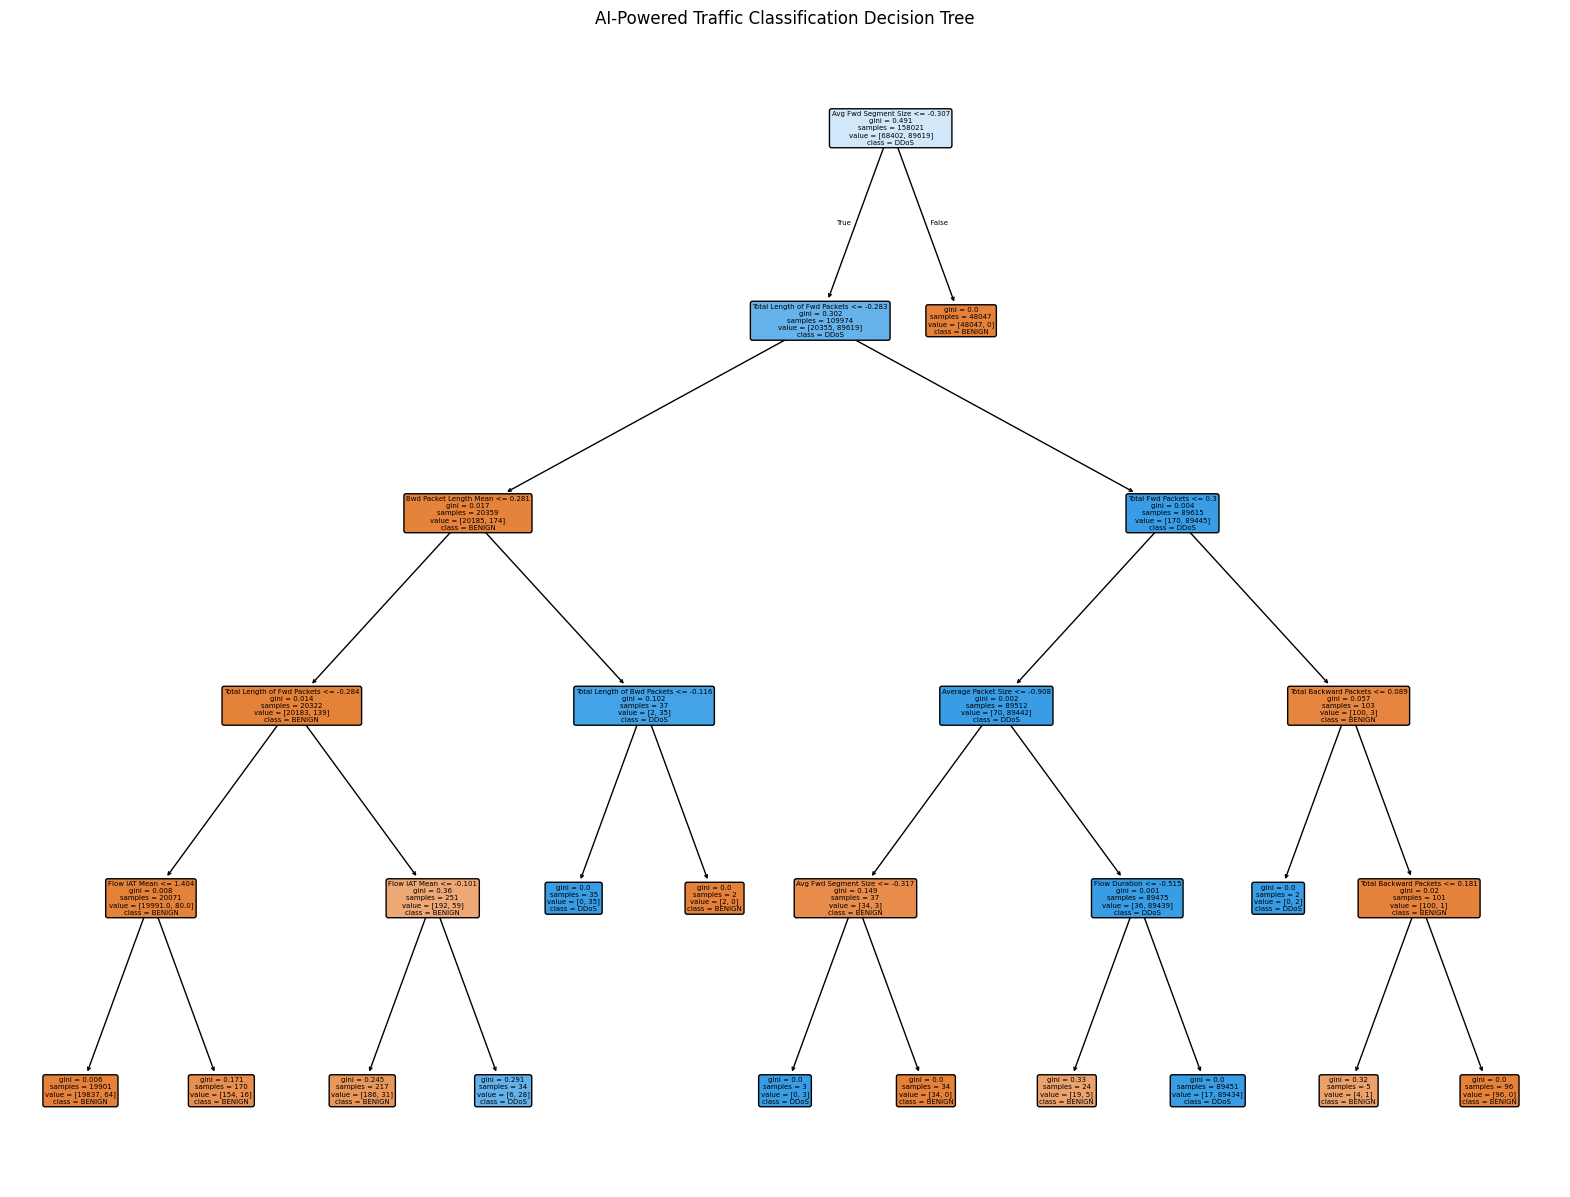

In [30]:
plt.figure(figsize=(20, 15))
plot_tree(
    dt_traffic, 
    feature_names=traffic_features, 
    class_names=class_names,
    filled=True, 
    rounded=True
)
plt.title("AI-Powered Traffic Classification Decision Tree")
plt.show()


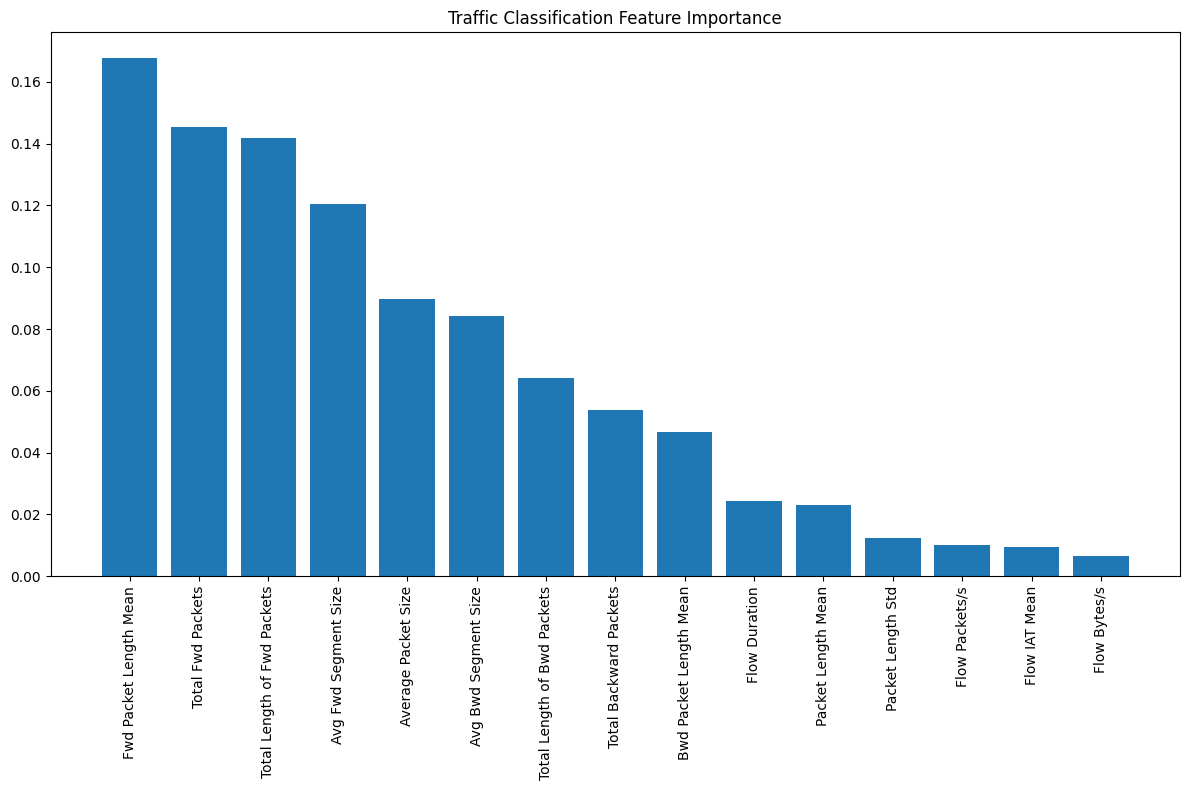

Top 10 important features:
1. Fwd Packet Length Mean: 0.1677
2. Total Fwd Packets: 0.1455
3. Total Length of Fwd Packets: 0.1419
4. Avg Fwd Segment Size: 0.1205
5. Average Packet Size: 0.0899
6. Avg Bwd Segment Size: 0.0841
7. Total Length of Bwd Packets: 0.0641
8. Total Backward Packets: 0.0539
9. Bwd Packet Length Mean: 0.0468
10. Flow Duration: 0.0242


In [31]:
def plot_feature_importance(model, feature_names, title):
    """Plot feature importance"""
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Print top 10 features
    print("Top 10 important features:")
    for i in range(min(10, len(indices))):
        print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot traffic classification feature importance
plot_feature_importance(
    rf_traffic, 
    traffic_features, 
    "Traffic Classification Feature Importance"
)

Threat Detection - Random Forest Model Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     29316
        DDoS       1.00      1.00      1.00     38408

    accuracy                           1.00     67724
   macro avg       1.00      1.00      1.00     67724
weighted avg       1.00      1.00      1.00     67724



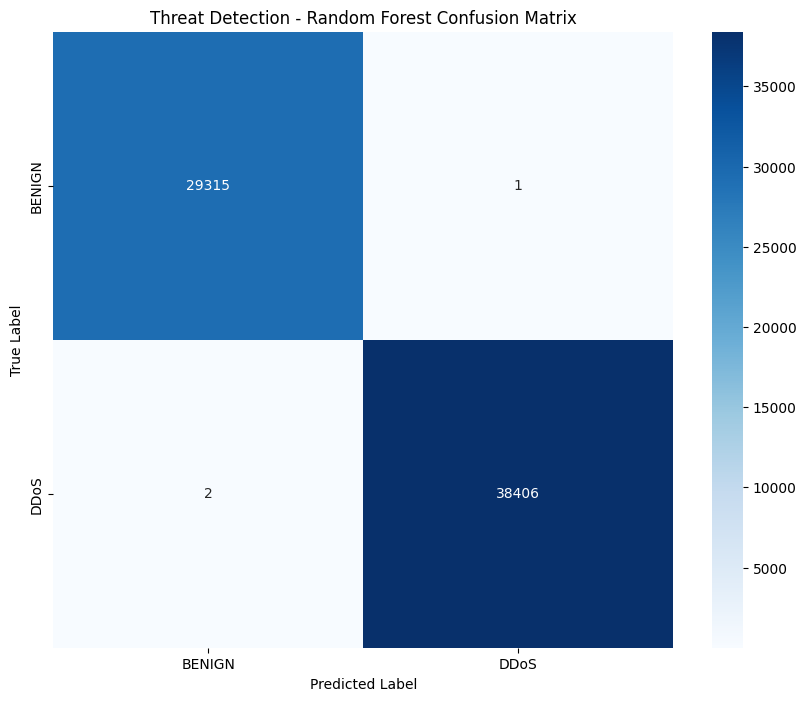

In [32]:
# Threat Detection - Random Forest Report
print("Threat Detection - Random Forest Model Report:")
print(classification_report(y_test_threat, y_pred_rf_threat, target_names=class_names))

# Plot confusion matrix for threat detection (Random Forest)
plot_confusion_matrix(
    y_test_threat, 
    y_pred_rf_threat, 
    class_names,
    "Threat Detection - Random Forest Confusion Matrix"
)

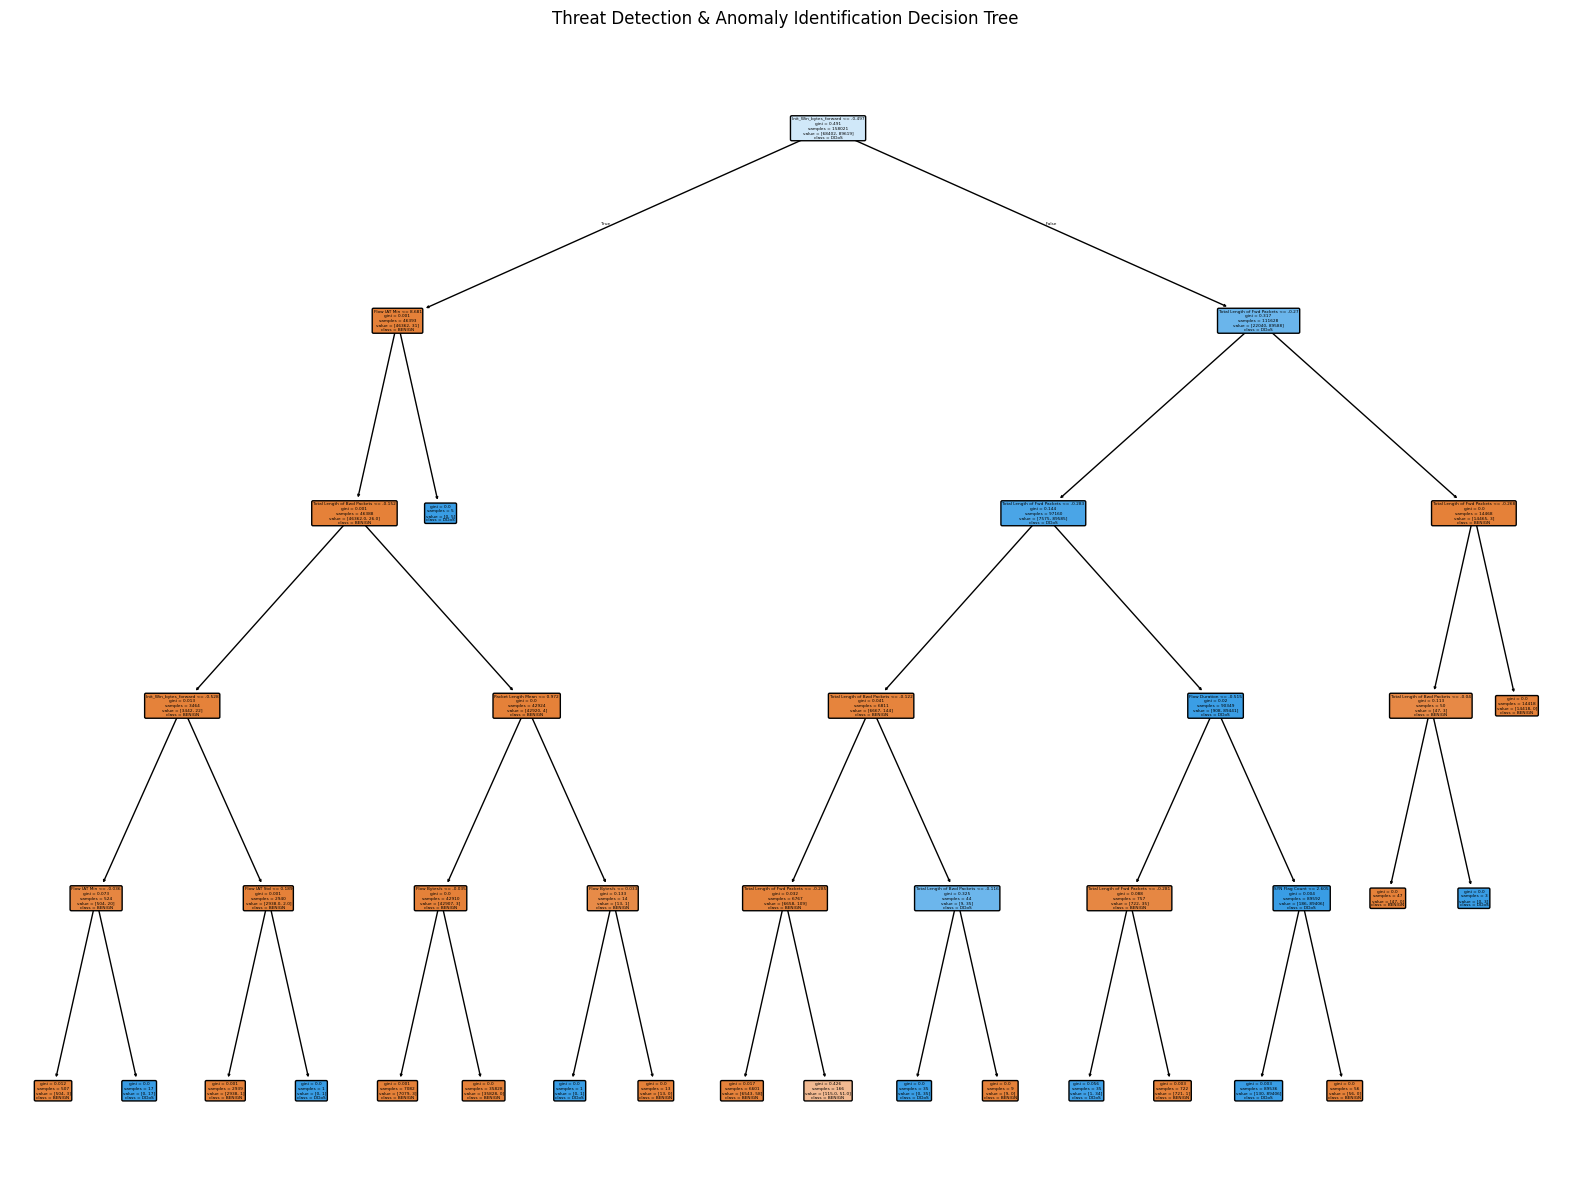

In [33]:
plt.figure(figsize=(20, 15))
plot_tree(
    dt_threat, 
    feature_names=threat_features, 
    class_names=class_names,
    filled=True, 
    rounded=True
)
plt.title("Threat Detection & Anomaly Identification Decision Tree")
plt.show()

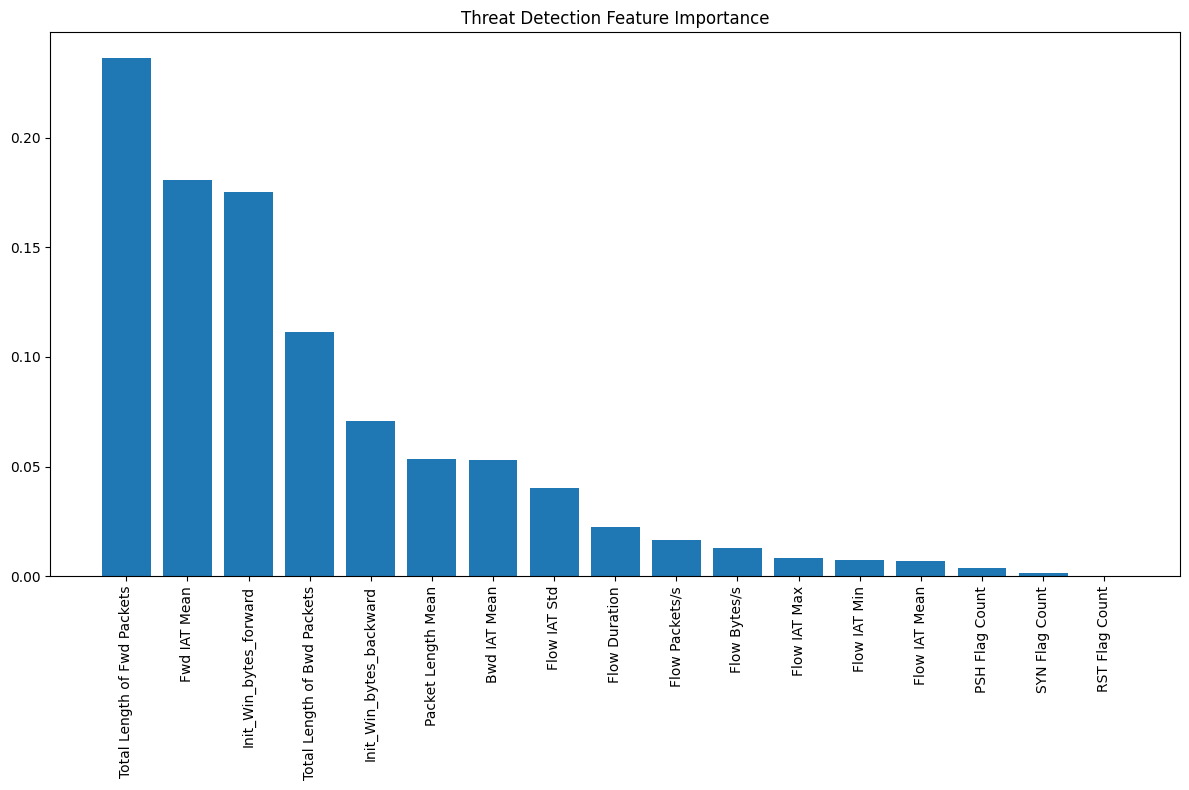

Top 10 important features:
1. Total Length of Fwd Packets: 0.2363
2. Fwd IAT Mean: 0.1808
3. Init_Win_bytes_forward: 0.1755
4. Total Length of Bwd Packets: 0.1112
5. Init_Win_bytes_backward: 0.0708
6. Packet Length Mean: 0.0532
7. Bwd IAT Mean: 0.0532
8. Flow IAT Std: 0.0401
9. Flow Duration: 0.0222
10. Flow Packets/s: 0.0166


In [34]:
# Plot threat detection feature importance
plot_feature_importance(
    rf_threat, 
    threat_features, 
    "Threat Detection Feature Importance"
)

In [35]:
def predict_traffic_type(model, scaler, features, feature_names, class_names):
    """
    Predict traffic type for new data
    """
    # Create a dataframe with the feature names
    input_df = pd.DataFrame([features], columns=feature_names)
    
    # Scale the features
    scaled_features = scaler.transform(input_df)
    
    # Make prediction
    prediction = model.predict(scaled_features)
    
    # Get the predicted class name
    predicted_class = class_names[prediction[0]]
    
    # Get prediction probabilities
    probabilities = model.predict_proba(scaled_features)[0]
    
    return predicted_class, probabilities

# Example new traffic data (replace with actual values)
# Format: [Flow Duration, Total Fwd Packets, Total Backward Packets, ...]
# These values should match the order of traffic_features

new_traffic_data = [
    5.0,        # Flow Duration
    50,         # Total Fwd Packets
    30,         # Total Backward Packets
    10000,      # Total Length of Fwd Packets
    5000,       # Total Length of Bwd Packets
    16.0,       # Flow Packets/s
    3000.0,     # Flow Bytes/s
    0.1,        # Flow IAT Mean
    200,        # Fwd Packet Length Mean
    166.6,      # Bwd Packet Length Mean
    185.7,      # Avg Packet Size
    200,        # Avg Fwd Segment Size
    166.6,      # Avg Bwd Segment Size
    185.7,      # Packet Length Mean
    20          # Packet Length Std
]

# Make prediction for the new traffic data
predicted_class, probabilities = predict_traffic_type(
    rf_traffic, 
    scaler_traffic, 
    new_traffic_data, 
    traffic_features, 
    class_names
)

print(f"Predicted traffic class: {predicted_class}")
print("Prediction probabilities:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {probabilities[i]:.4f}")


Predicted traffic class: BENIGN
Prediction probabilities:
BENIGN: 1.0000
DDoS: 0.0000


In [36]:
import pickle

# Save the traffic classification models
with open('rf_traffic_model.pkl', 'wb') as f:
    pickle.dump(rf_traffic, f)

with open('dt_traffic_model.pkl', 'wb') as f:
    pickle.dump(dt_traffic, f)

# Save the threat detection models
with open('rf_threat_model.pkl', 'wb') as f:
    pickle.dump(rf_threat, f)

with open('dt_threat_model.pkl', 'wb') as f:
    pickle.dump(dt_threat, f)

# Save the scalers
with open('scaler_traffic.pkl', 'wb') as f:
    pickle.dump(scaler_traffic, f)

with open('scaler_threat.pkl', 'wb') as f:
    pickle.dump(scaler_threat, f)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

print("Models, scalers, and encoder saved successfully!")

Models, scalers, and encoder saved successfully!
